## インポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('dataset.csv')
test = pd.read_csv('test.csv')
train

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
1,1,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,2,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
3,3,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
4,4,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17812,17812,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
17813,17813,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
17814,17814,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
17815,17815,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## データの確認

In [2]:
train.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,17817.000000,17817.000000,1.781700e+04,1.781700e+04,1.781700e+04,1.781700e+04,1.781700e+04,1.781700e+04,1.781700e+04,17817.000000,17817.000000
mean,8908.000000,1.408313,8.500089e+05,2.933371e+05,2.952880e+05,2.292022e+04,2.384615e+05,1.813521e+05,5.403024e+04,3079.168943,2016.139361
std,5143.469209,0.403787,3.450806e+06,1.266445e+06,1.204917e+06,1.078728e+05,9.810715e+05,7.423618e+05,2.427115e+05,17592.439916,0.933551
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4454.000000,1.100000,1.081727e+04,8.577400e+02,3.016270e+03,0.000000e+00,5.011370e+03,2.783850e+03,1.248100e+02,0.000000,2015.000000
50%,8908.000000,1.370000,1.073768e+05,8.637110e+03,2.917856e+04,1.851100e+02,3.967601e+04,2.626785e+04,2.633320e+03,0.000000,2016.000000
75%,13362.000000,1.670000,4.327297e+05,1.112640e+05,1.502989e+05,6.277210e+03,1.103320e+05,8.315644e+04,2.187064e+04,128.750000,2017.000000
max,17816.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [3]:
# 欠損値があるか確認
train.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
# それぞれの列のデータの型を確認
train.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
# trainデータとtestデータがどのような日付で分けられているか
train_unique_date = np.unique(train['Date'])
test_unique_date = np.unique(test['Date'])
print('train: ',train_unique_date)
print('test: ',test_unique_date)

train:  ['2015-01-04' '2015-01-11' '2015-01-18' '2015-01-25' '2015-02-01'
 '2015-02-08' '2015-02-15' '2015-02-22' '2015-03-01' '2015-03-08'
 '2015-03-15' '2015-03-22' '2015-03-29' '2015-04-05' '2015-04-12'
 '2015-04-19' '2015-04-26' '2015-05-03' '2015-05-10' '2015-05-17'
 '2015-05-24' '2015-05-31' '2015-06-07' '2015-06-14' '2015-06-21'
 '2015-06-28' '2015-07-05' '2015-07-12' '2015-07-19' '2015-07-26'
 '2015-08-02' '2015-08-09' '2015-08-16' '2015-08-23' '2015-08-30'
 '2015-09-06' '2015-09-13' '2015-09-20' '2015-09-27' '2015-10-04'
 '2015-10-11' '2015-10-18' '2015-10-25' '2015-11-01' '2015-11-08'
 '2015-11-15' '2015-11-22' '2015-11-29' '2015-12-06' '2015-12-13'
 '2015-12-20' '2016-01-03' '2016-01-10' '2016-01-17' '2016-01-24'
 '2016-01-31' '2016-02-07' '2016-02-14' '2016-02-21' '2016-02-28'
 '2016-03-06' '2016-03-13' '2016-03-20' '2016-03-27' '2016-04-03'
 '2016-04-10' '2016-04-17' '2016-04-24' '2016-05-01' '2016-05-08'
 '2016-05-15' '2016-05-22' '2016-05-29' '2016-06-05' '2016-06-12'
 '

- trainデータは2015年〜2018年の３月まで、１週間おきのデータとなっている
- testデータはそれぞれの年の最後の週になっている。
- 前処理で７週間前までのAverage Priceをデータに追加するため、trainデータとtestデータを結合して連続した時系列データにする。

In [6]:
train_test = train.append(test)

# 日付順に並び替える
train_test = train_test.sort_values(by=['Date'],ascending=True)

# 日付をインデックスにする
train_test = train_test.set_index('Date')

/Users/sen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [7]:
# string型のカラム、region、typeのそれぞれのユニークな数を確認
region_list = train_test['region'].unique()
type_list = train_test['type'].unique()
print('region :',region_list)
print('types: ',len(region_list))
print('type: ',type_list)
print('types: ',len(type_list))

region : ['NewOrleansMobile' 'TotalUS' 'Denver' 'Charlotte' 'Atlanta'
 'Indianapolis' 'Sacramento' 'SouthCarolina' 'Spokane' 'Northeast'
 'Chicago' 'LasVegas' 'NewYork' 'West' 'Louisville' 'CincinnatiDayton'
 'Roanoke' 'Columbus' 'GreatLakes' 'HarrisburgScranton' 'SanDiego'
 'RichmondNorfolk' 'Nashville' 'WestTexNewMexico' 'SouthCentral'
 'DallasFtWorth' 'Pittsburgh' 'Jacksonville' 'MiamiFtLauderdale' 'Boise'
 'Albany' 'Seattle' 'HartfordSpringfield' 'California' 'BuffaloRochester'
 'Boston' 'Midsouth' 'StLouis' 'Tampa' 'SanFrancisco'
 'BaltimoreWashington' 'LosAngeles' 'Philadelphia' 'PhoenixTucson'
 'Orlando' 'Houston' 'Plains' 'RaleighGreensboro' 'Portland' 'Southeast'
 'GrandRapids' 'Detroit' 'Syracuse' 'NorthernNewEngland']
types:  54
type:  ['organic' 'conventional']
types:  2


In [8]:
# ある計測値のサンプル数をチェック
df_sub = train_test[train_test['region'] == 'Albany']
df_sub_1 = df_sub[df_sub['type'] == 'organic']
df_sub_2 = df_sub[df_sub['type'] == 'conventional']
print("Albany_organic: ",len(df_sub_1))
print("Albany_conventional: ", len(df_sub_2))

Albany_organic:  169
Albany_conventional:  169


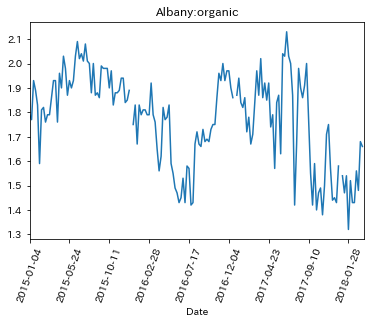

In [9]:
# ある計測値のアボカドの平均価格をプロット
df_sub_ap_1 = df_sub_1['AveragePrice'] # 計測値=Albany、タイプ=organicのアボカドの平均価格
df_sub_ap_2 = df_sub_2['AveragePrice'] #  計測値=Albany、タイプ=conventionalのアボカドの平均価格
df_sub_ap_1.plot()
plt.title('Albany:organic')
plt.xticks(rotation=70)
plt.show()

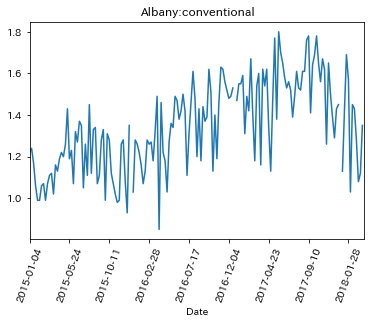

In [10]:
df_sub_ap_2.plot()
plt.title('Albany:conventional')
plt.xticks(rotation=70)
plt.show()

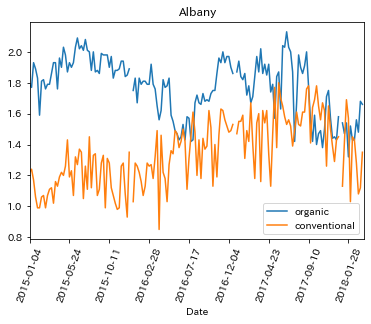

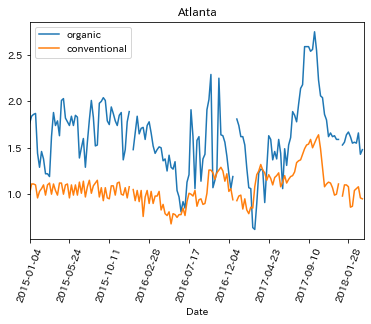

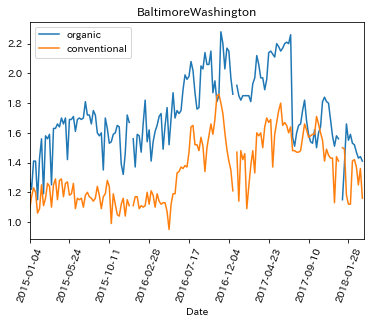

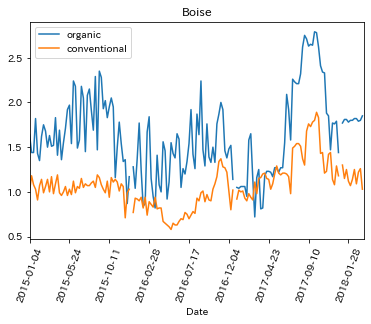

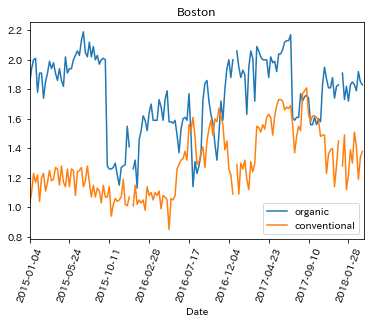

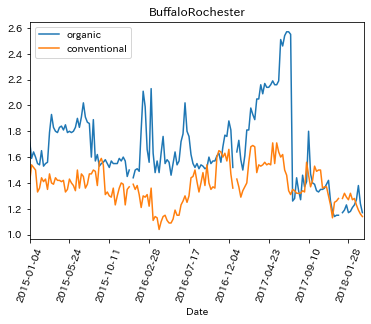

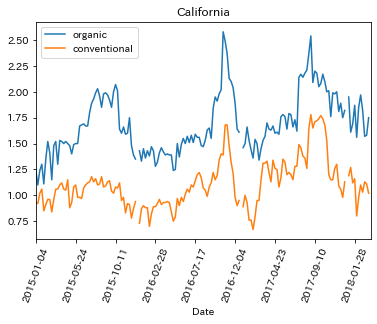

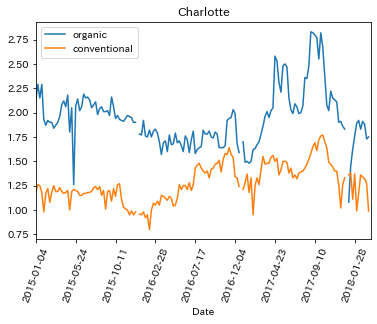

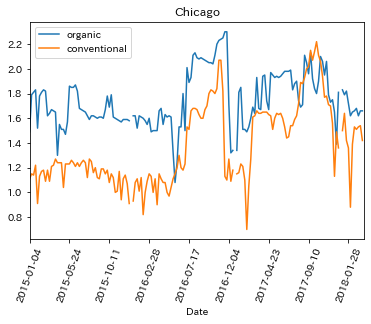

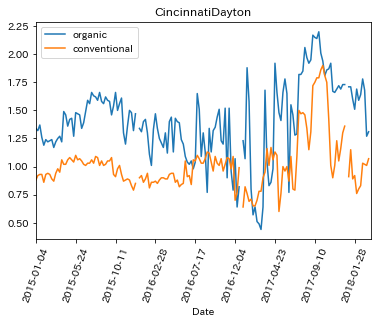

In [11]:
# 計測値１０箇所のアボカドの平均価格をプロット
for i, region in enumerate(np.unique(train_test['region'])):
    if i == 10:
        break
        
    df_sub = train_test[train_test['region'] == region]
    df_sub_organic = df_sub[df_sub['type'] == 'organic']
    df_sub_conventional = df_sub[df_sub['type'] == 'conventional']
    df_sub_o_ap = df_sub_organic['AveragePrice']
    df_sub_c_ap = df_sub_conventional['AveragePrice']
    df_sub_o_ap.plot()
    df_sub_c_ap.plot()
    plt.title(region)
    plt.xticks(rotation=70) # xラベルを縦表にする
    plt.legend(['organic','conventional'])
    plt.show()

In [12]:
# インデックスを元に戻しておく
train_test.reset_index(inplace=True)
train_test

,Date,4046,4225,4770,AveragePrice,Large Bags,Small Bags,Total Bags,Total Volume,Unnamed: 0,XLarge Bags,region,type,year
0,2015-01-04,220.61,23.64,0.00,1.41,0.00,2360.00,2360.00,2604.25,10337,0.00,NewOrleansMobile,organic,2015
1,2015-01-04,12357161.34,13624083.05,844093.32,0.95,894945.63,3585321.58,4498940.02,31324277.73,2651,18672.81,TotalUS,conventional,2015
2,2015-01-04,3199.35,6916.72,7.56,1.42,11279.77,1076.67,12356.44,22480.07,9572,0.00,Denver,organic,2015
3,2015-01-04,29419.03,47220.75,38568.95,1.19,6468.53,44329.03,50797.56,166006.29,407,0.00,Charlotte,conventional,2015
4,2015-01-04,1500.15,938.35,0.00,1.76,336.84,1071.35,1408.19,3846.69,9011,0.00,Atlanta,organic,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-03-25,474642.82,53923.97,2049.21,NaN,61776.64,106478.51,168345.15,698961.15,186,90.00,MiamiFtLauderdale,conventional,2018
18245,2018-03-25,967164.69,1347066.73,25014.31,NaN,164970.47,1390840.94,1571829.62,3911075.35,187,16018.21,Midsouth,conventional,2018
18246,2018-03-25,125788.54,10713.80,334.61,NaN,30406.07,136737.44,169443.57,306280.52,188,2300.06,Nashville,conventional,2018
18247,2018-03-25,860997.47,1144066.23,459002.28,NaN,282886.20,1397088.59,1781881.22,4245947.20,177,101906.43,GreatLakes,conventional,2018


In [13]:
train_test.describe()

,4046,4225,4770,AveragePrice,Large Bags,Small Bags,Total Bags,Total Volume,Unnamed: 0,XLarge Bags,year
count,1.824900e+04,1.824900e+04,1.824900e+04,17817.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,2.930084e+05,2.951546e+05,2.283974e+04,1.408313,5.433809e+04,1.821947e+05,2.396392e+05,8.506440e+05,8702.226533,3106.426507,2016.147899
std,1.264989e+06,1.204120e+06,1.074641e+05,0.403787,2.439660e+05,7.461785e+05,9.862424e+05,3.453545e+06,5251.265076,17692.894652,0.939938
min,0.000000e+00,0.000000e+00,0.000000e+00,0.440000,0.000000e+00,0.000000e+00,0.000000e+00,8.456000e+01,0.000000,0.000000,2015.000000
25%,8.540700e+02,3.008780e+03,0.000000e+00,1.100000,1.274700e+02,2.849420e+03,5.088640e+03,1.083858e+04,4130.000000,0.000000,2015.000000
50%,8.645300e+03,2.906102e+04,1.849900e+02,1.370000,2.647710e+03,2.636282e+04,3.974383e+04,1.073768e+05,8692.000000,0.000000,2016.000000
75%,1.110202e+05,1.502069e+05,6.243420e+03,1.670000,2.202925e+04,8.333767e+04,1.107834e+05,4.329623e+05,13254.000000,132.500000,2017.000000
max,2.274362e+07,2.047057e+07,2.546439e+06,3.250000,5.719097e+06,1.338459e+07,1.937313e+07,6.250565e+07,17816.000000,551693.650000,2018.000000


## 前処理

In [14]:
matrix_organic = train_test[train_test['type'] == 'organic']
matrix_conventional = train_test[train_test['type'] == 'conventional']
matrix = []
region_list = np.unique(train_test['region'])
for i, region in enumerate(region_list):           
    df_region_organic = matrix_organic[matrix_organic['region'] == region].sort_values('Date')
    for j_1 in range(1,9):
        df_region_organic['prev' + str(j_1)] = df_region_organic['AveragePrice'].shift(j_1) # 8週間前の平均価格
    df_region_conventional = matrix_conventional[matrix_conventional['region'] == region].sort_values('Date')
    for j_2 in range(1,9):
        df_region_conventional['prev' + str(j_2)] = df_region_conventional['AveragePrice'].shift(j_2) # 8週間前の平均価格
        
    matrix += list(df_region_organic.values)
    matrix += list(df_region_conventional.values)
    
    if i == 0:
        colnames = df_region_organic.columns
        
matrix = pd.DataFrame(matrix, columns=colnames)

質的変数の変換

In [15]:
# type列は、organicは１に、conventionalは０にする
matrix['type'] = matrix['type'].apply(lambda x : 1 if x == 'organic' else 0)
print(matrix['type'].unique())

[1 0]


In [16]:
# date列を変換
matrix['Month'] = matrix['Date'].apply(lambda x : int(x.split('-')[1]))
matrix['Day'] = matrix['Date'].apply(lambda x : int(x.split('-')[2]))
matrix.to_csv('matrix.csv')
matrix.isnull().sum()

Date               0
4046               0
4225               0
4770               0
AveragePrice     432
Large Bags         0
Small Bags         0
Total Bags         0
Total Volume       0
Unnamed: 0         0
XLarge Bags        0
region             0
type               0
year               0
prev1            432
prev2            540
prev3            648
prev4            756
prev5            864
prev6            972
prev7           1080
prev8           1188
Month              0
Day                0
dtype: int64

In [17]:
# region列をダミー変数化
matrix = pd.get_dummies(matrix, drop_first=False, columns=["region"])
matrix.to_csv('20200322_matrix.csv')

分割

In [18]:
# trainデータとtestデータに分割
matrix_test = matrix.dropna() 
X_train = matrix_test.drop(['AveragePrice','Date'],axis=1)
X_train = np.array(X_train).reshape(len(X_train), len(X_train.columns), 1)
y_train = matrix_test['AveragePrice']
X_test = matrix[matrix['AveragePrice'].isnull()].drop(['AveragePrice','Date'],axis=1)
X_test = np.array(X_test).reshape(len(X_test), len(X_test.columns), 1)
print('X_train: ',X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)

X_train:  (14361, 75, 1)
y_train:  (14361,)
X_test:  (432, 75, 1)


## モデル作成　予測

# RNN

In [19]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [20]:
length_of_sequence = X_train.shape[1] 
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
result = model.fit(X_train, y_train,
              batch_size=50,
              epochs=1000,
              validation_split=0.2,
              callbacks=[early_stopping]
              )

Train on 11488 samples, validate on 2873 samples
Epoch 1/1000
11488/11488 [==============================] - 76s 7ms/step - loss: 0.2743 - val_loss: 0.1818
Epoch 2/1000
11488/11488 [==============================] - 76s 7ms/step - loss: 0.1690 - val_loss: 0.1718
Epoch 3/1000
11488/11488 [==============================] - 75s 7ms/step - loss: 0.1700 - val_loss: 0.1665
Epoch 4/1000
11488/11488 [==============================] - 90s 8ms/step - loss: 0.1696 - val_loss: 0.1720
Epoch 5/1000
11488/11488 [==============================] - 90s 8ms/step - loss: 0.1701 - val_loss: 0.1740
Epoch 6/1000
11488/11488 [==============================] - 95s 8ms/step - loss: 0.1686 - val_loss: 0.1696
Epoch 7/1000
11488/11488 [==============================] - 73s 6ms/step - loss: 0.1291 - val_loss: 0.0471
Epoch 8/1000
11488/11488 [==============================] - 71s 6ms/step - loss: 0.0459 - val_loss: 0.0427
Epoch 9/1000
11488/11488 [==============================] - 71s 6ms/step - loss: 0.0393 - val_l

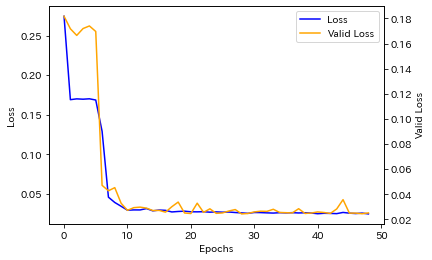

In [22]:
# 学習過程を2軸プロット
fig, ax1 = plt.subplots()
ax1.plot(result.epoch, result.history["loss"], color="blue", label="Loss")
ax2 = ax1.twinx()  # 2つのプロットを関連付ける
ax2.plot(result.epoch, result.history["val_loss"], color="orange", label="Valid Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax2.set_ylabel("Valid Loss")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

plt.show()

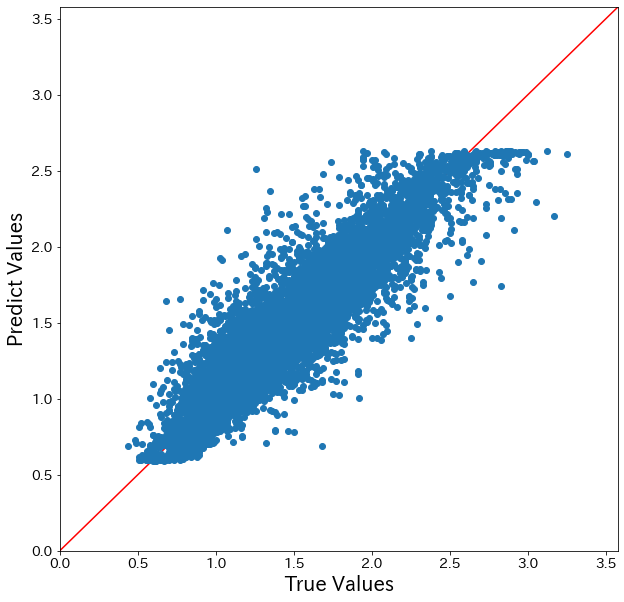

In [23]:
plt.figure(figsize=[10,10])
y_pred = model.predict(X_train)
axis_range = [0, np.max([np.max(y_train),np.max(y_pred)])*1.1]
plt.xlim(axis_range)
plt.ylim(axis_range)
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predict Values', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(axis_range, axis_range, color='red', zorder=-1)
plt.scatter(
    y_train,
    y_pred
)
plt.show()

In [24]:
pred = model.predict(X_test)
pred

array([[1.844537  ],
       [1.8645122 ],
       [1.5937362 ],
       [1.6856859 ],
       [1.2078326 ],
       [1.4397445 ],
       [1.410954  ],
       [1.2940435 ],
       [1.9125767 ],
       [1.3074448 ],
       [1.6147461 ],
       [1.518919  ],
       [1.0488896 ],
       [1.0407866 ],
       [1.0978353 ],
       [0.99104863],
       [1.6338825 ],
       [1.8775363 ],
       [1.5947185 ],
       [1.47381   ],
       [1.0869415 ],
       [1.2766445 ],
       [1.378866  ],
       [1.2332082 ],
       [1.2163658 ],
       [1.3203526 ],
       [1.5786576 ],
       [1.853934  ],
       [1.0307541 ],
       [0.9972214 ],
       [1.1847432 ],
       [1.0988739 ],
       [1.4227707 ],
       [1.9598851 ],
       [1.78848   ],
       [1.8554733 ],
       [1.067777  ],
       [1.174995  ],
       [1.3717506 ],
       [1.3835022 ],
       [1.5094113 ],
       [1.6532929 ],
       [1.206759  ],
       [1.2217667 ],
       [1.3005941 ],
       [1.4232726 ],
       [1.2595825 ],
       [1.172

In [25]:
test_pred = matrix[matrix['AveragePrice'].isnull()].drop(['AveragePrice','Date'],axis=1)
test_pred['pred'] = pred
test_pred.to_csv('test_pred.csv')